In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+(np.exp(-z)))
    
    return s

In [3]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim,1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [4]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_n, 1)
    b -- bias, a scalar
    X -- data of size (num_n, number of examples)
    Y -- true "label" vector (containing 0, 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m)
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [5]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_n, 1)
    b -- bias, a scalar
    X -- data of shape (num_n, number of examples)
    Y -- true "label" vector (containing 0, 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 1000 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule 
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs
        if i % 1000 == 0:
            costs.append(cost)
        
        # Print the cost every 1000 training iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [6]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_n, 1)
    b -- bias, a scalar
    X -- data of size (num_n, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of being 1
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0,i]= A[0,i]>0.5
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [7]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_n, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_n, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Number of training examples: m_train = 105
Number of testing examples: m_test = 45
number of features of each example: num_n = 4
shape of x_train: (105, 4)
shape of y_train: (105, 1)
shape of x_test: (45, 4)
shape of y_test: (45, 1)


Text(0.5,1,'training data')

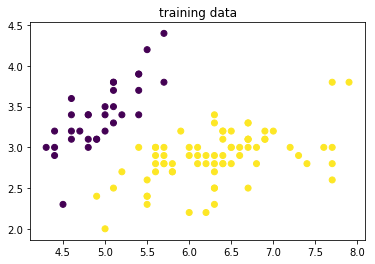

In [8]:
iris = datasets.load_iris()
x = iris.data
y = ((iris.target != 0) * 1)  # convert the target's dataset into binary

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

m_train = len(x_train)
m_test = len(x_test)
num_n = x_train.shape[1]
numtest_n = x_test.shape[1]

y_train = y_train.reshape(m_train,1)
y_test = y_test.reshape(m_test,1)

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("number of features of each example: num_n = " + str(num_n))
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

#data visualization
plt.scatter(x_train[:,0],x_train[:,1],c=y_train[:,0])
plt.title("training data")

In [9]:
print("shape of x_train.T:",x_train.T.shape)
print("shape of y_train.T:",y_train.T.shape)
print("shape of x_test.T:",x_test.T.shape)
print("shape of y_test.T:",y_test.T.shape)

shape of x_train.T: (4, 105)
shape of y_train.T: (1, 105)
shape of x_test.T: (4, 45)
shape of y_test.T: (1, 45)


In [10]:
d = model(x_train.T, y_train.T, x_test.T, y_test.T, num_iterations = 20000, learning_rate = 0.1, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.007514
Cost after iteration 2000: 0.004056
Cost after iteration 3000: 0.002831
Cost after iteration 4000: 0.002195
Cost after iteration 5000: 0.001801
Cost after iteration 6000: 0.001533
Cost after iteration 7000: 0.001337
Cost after iteration 8000: 0.001188
Cost after iteration 9000: 0.001071
Cost after iteration 10000: 0.000975
Cost after iteration 11000: 0.000896
Cost after iteration 12000: 0.000830
Cost after iteration 13000: 0.000773
Cost after iteration 14000: 0.000724
Cost after iteration 15000: 0.000681
Cost after iteration 16000: 0.000643
Cost after iteration 17000: 0.000609
Cost after iteration 18000: 0.000579
Cost after iteration 19000: 0.000552
train accuracy: 100.0 %
test accuracy: 100.0 %
